In [4321]:
# importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import itertools

In [4322]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4323]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os
import warnings 
warnings.filterwarnings('ignore')

In [4324]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 1. Data Preprocessing
## 1.1. EDA:

In [4325]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [4326]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4327]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4328]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4329]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4330]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 1.1.1.  Checking missing values

In [4331]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4332]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 1.1.2 Features Visualization:

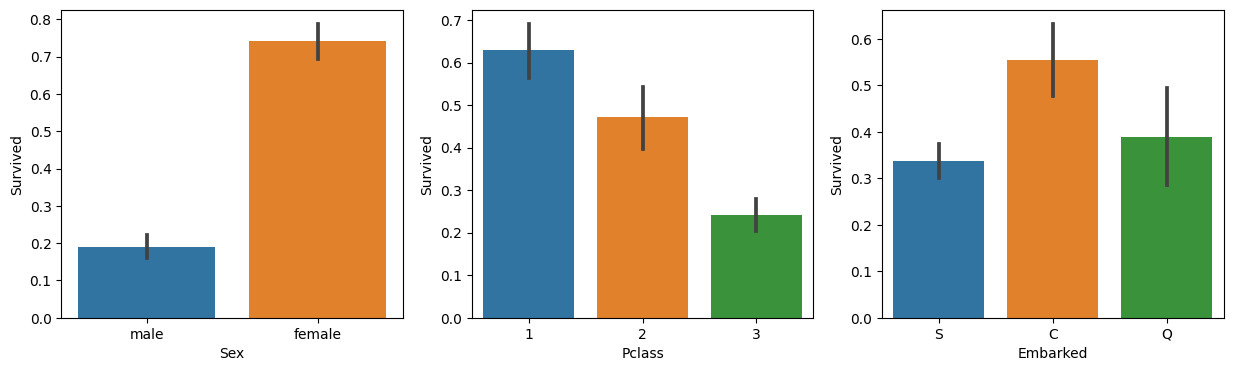

In [4333]:
def barplot(data, feature1, feature2, feature3):
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    sns.barplot(x=feature1, y='Survived', data=data)
    
    plt.subplot(1, 3, 2)
    sns.barplot(x=feature2, y='Survived', data=data)
    
    plt.subplot(1, 3, 3)
    sns.barplot(x=feature3, y='Survived', data=data)
    
    return plt.show()

barplot2(train, 'Sex', 'Pclass', 'Embarked')

### 1.1.3. Checking the outliers:

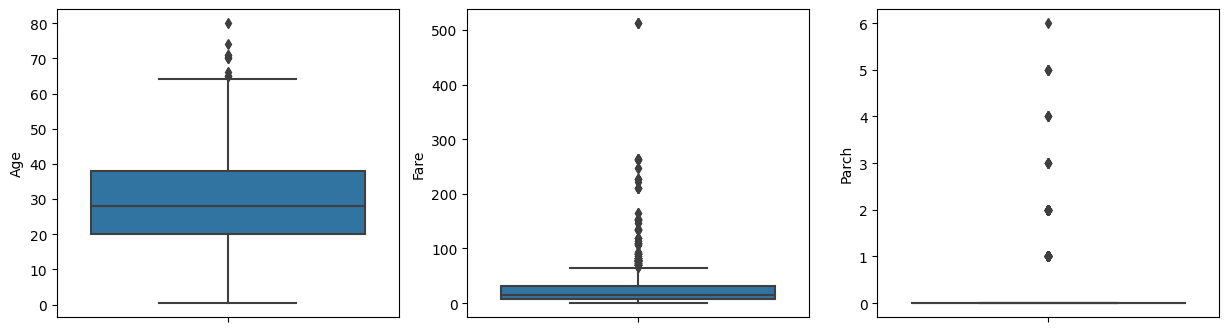

In [4334]:
def boxplot(data, feature1, feature2, feature3):
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data[feature1])
    
    plt.subplot(1, 3, 2)
    sns.boxplot(y=data[feature2])
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[feature3])
    
    return plt.show()

boxplot(train, 'Age', 'Fare', 'Parch')

### 1.1.4. Skewness:

In [4335]:
def skewness(data, feature):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist='norm', plot=plt)
    
    return plt.show()

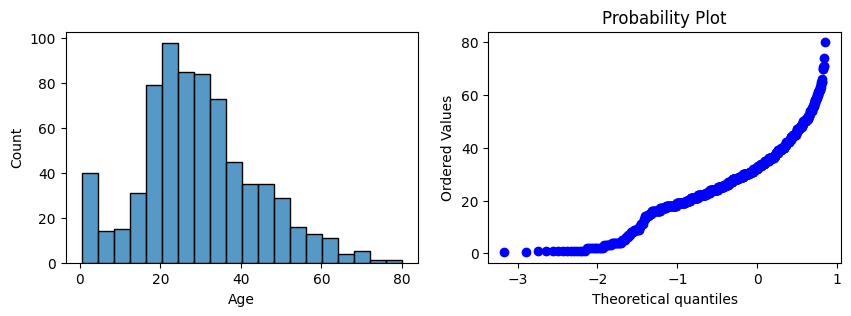

In [4336]:
skewness(train, 'Age')

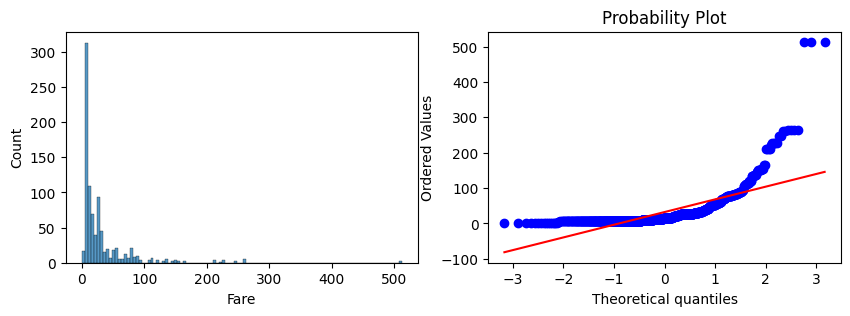

In [4337]:
skewness(train, 'Fare')

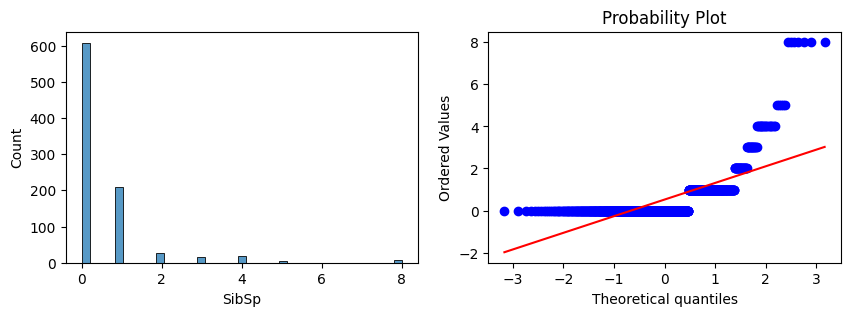

In [4338]:
skewness(train, 'SibSp')

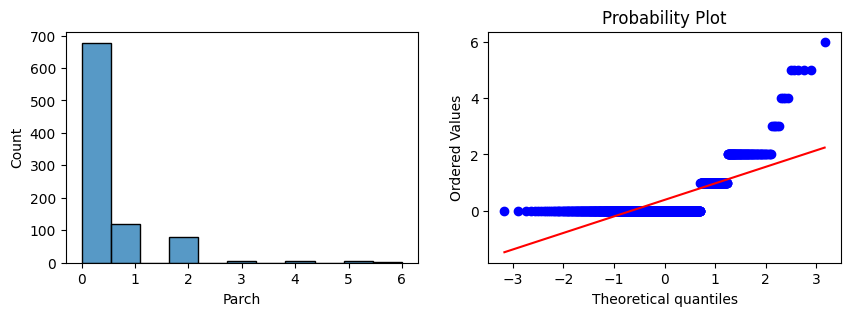

In [4339]:
skewness(train, 'Parch')

### 1.1.5. Correlation:

<AxesSubplot:>

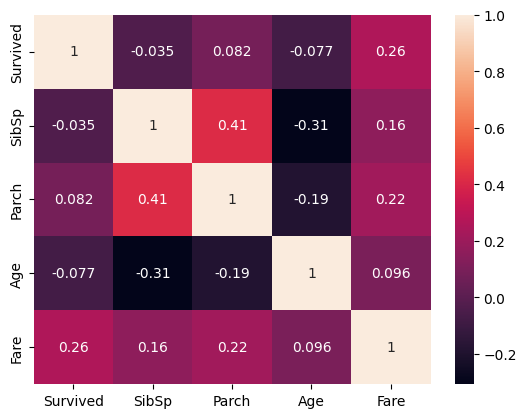

In [4340]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True)

## 1.2. Data Preprocessing:
### 1.2.1. Removing outliers:

In [4341]:
Q1 = np.percentile(train['Fare'],25)
Q3 = np.percentile(train['Fare'],75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
train = train[(train['Fare'] > lower) & (train['Fare'] < upper)].reset_index(drop=True)
print(train.shape)

(775, 12)


### 1.2.2. Handling missing data:

In [4342]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            162
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          661
Embarked         0
dtype: int64

In [4343]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4344]:
train_age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(train_age_median)
test_age_median = test['Age'].median()
test['Age'] = test['Age'].fillna(test_age_median)

In [4345]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [4346]:
train = train.dropna()

In [4347]:
test = test.dropna()

In [4348]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.7+ KB


### 1.2.3. Guassian Transformation (Fare feature)
### Logarithmic Transformation:

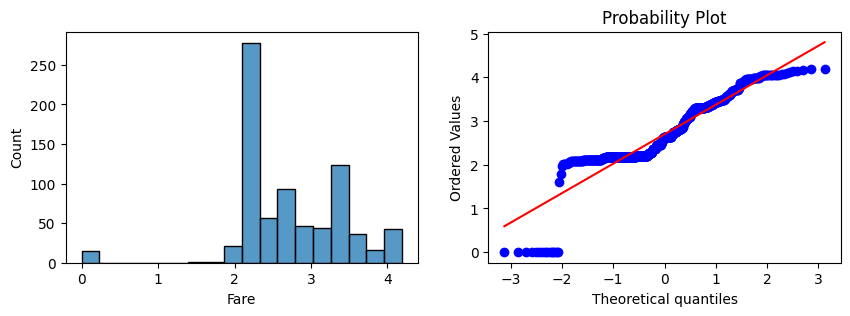

In [4350]:
train['Fare'] = np.log(train['Fare'] + 1)
skewness(train, 'Fare')

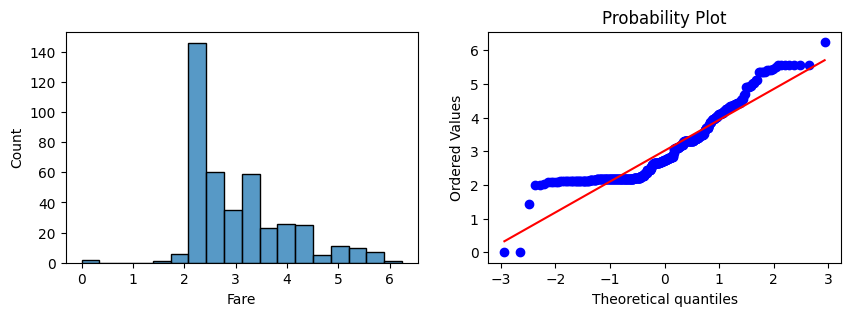

In [4351]:
test['Fare'] = np.log(test['Fare'] + 1)
skewness(test, 'Fare')

### 1.2.4. Creating new features:

Creating an age_group based on 'Age' feature

In [4352]:
'''age_group = pd.cut(train['Age'], bins=[0, 20, 40, 60, 80], labels=['young', 'lower_mid_age', 'upper_mid_age', 'old'])
train['Age_group'] = age_group
train.head()'''

"age_group = pd.cut(train['Age'], bins=[0, 20, 40, 60, 80], labels=['young', 'lower_mid_age', 'upper_mid_age', 'old'])\ntrain['Age_group'] = age_group\ntrain.head()"

In [4353]:
'''age_group = pd.cut(test['Age'], bins=[0, 20, 40, 60, 80], labels=['young', 'lower_mid_age', 'upper_mid_age', 'old'])
test['Age_group'] = age_group
test.head()'''

"age_group = pd.cut(test['Age'], bins=[0, 20, 40, 60, 80], labels=['young', 'lower_mid_age', 'upper_mid_age', 'old'])\ntest['Age_group'] = age_group\ntest.head()"

Creating a variable 'Family_Size' based on 'SibSp' and 'Parch'
Creating a variable 'Is_Alone' based on 'Family_Size'

In [4354]:
train['Family_size'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,0
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,0


In [4355]:
test['Family_size'] = test['SibSp'] + test['Parch']
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S,2


Creating a feature 'Is_alone' based on 'Family_size'

In [4356]:
train['Is_alone'] = 0
train.loc[train['Family_size'] >= 1, 'Is_alone'] = 1
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,1,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,0,0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,1,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,0,0
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,0,0


In [4357]:
test['Is_alone'] = 0
test.loc[test['Family_size'] >= 1, 'Is_alone'] = 1
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Is_alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S,2,1


### 1.2.5. Dropping unwanted features:

PassengerId and Name will be dropped as they are not involved in machine learning predictions.

In [4358]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Is_alone
0,0,3,male,22.0,2.110213,S,1,1
1,1,3,female,26.0,2.188856,S,0,0
2,1,1,female,35.0,3.990834,S,1,1
3,0,3,male,35.0,2.202765,S,0,0
4,0,3,male,28.0,2.246893,Q,0,0


In [4359]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family_size,Is_alone
0,3,male,34.5,2.178064,Q,0,0
1,3,female,47.0,2.079442,S,1,1
2,2,male,62.0,2.369075,Q,0,0
3,3,male,27.0,2.268252,S,0,0
4,3,female,22.0,2.586824,S,2,1


### 1.2.6. Encoding:

Encoding the 'Sex', 'Embarked' features using One-Hot encoding

In [4360]:
train_sex_dummies = pd.get_dummies(train['Sex'])
train = pd.concat([train, train_sex_dummies], axis=1)

In [4361]:
train_embarked_dummies = pd.get_dummies(train['Embarked'])
train = pd.concat([train, train_embarked_dummies], axis=1)

In [4362]:
train = train.drop(['Sex', 'female', 'Embarked', 'S'], axis=1)

In [4363]:
test_age_dummies = pd.get_dummies(test['Sex'])
test = pd.concat([test, test_age_dummies], axis=1)

In [4364]:
test_embarked_dummies = pd.get_dummies(test['Embarked'])
test = pd.concat([test, test_embarked_dummies], axis=1)

In [4365]:
test = test.drop(['Sex', 'female', 'Embarked', 'S'], axis=1)

### 1.2.7. Splitting the data:

In [4366]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
'''
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)'''

'\nprint("X_train shape: ", X_train.shape)\nprint("Y_train shape: ", Y_train.shape)\nprint("X_test shape: ", X_test.shape)'

In [4367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4368]:
print(f'The shape of X_train: {X_train.shape}')
print(f'The shape of X_test: {X_test.shape}')
print(f'The shape of y_train: {y_train.shape}')
print(f'The shape of y_test: {y_test.shape}')

The shape of X_train: (620, 8)
The shape of X_test: (155, 8)
The shape of y_train: (620,)
The shape of y_test: (155,)


# 2. Building models:

In [4369]:
# function for Logistic Regression, SVM, KNN, Decision Tree and Random Forest:
def build_model(model_name, model, feature, target):
    model_name = model
    model_name.fit(feature, target)

In [4370]:
models = {'lr': LogisticRegression(),
          'svm': SVC(),
          'knn': KNeighborsClassifier(n_neighbors = 5),
          'dt' : DecisionTreeClassifier(),
          'rf' : RandomForestClassifier(n_estimators=70)}
for key, value in models.items():
    build_model(key, value, X_train, y_train)

In [4371]:
# Function for ANN model:
def ann_model():
    ann = keras.Sequential()
    ann.add(keras.layers.Dense(100, input_shape=(8,), activation='relu'))
    ann.add(keras.layers.Dense(1, activation='sigmoid'))
    ann.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return ann

ann = ann_model()
ann.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.7737 - accuracy: 0.6169 - val_loss: 0.5743 - val_accuracy: 0.7903
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7259 - accuracy: 0.6048 - val_loss: 0.5053 - val_accuracy: 0.8306
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.7560 - val_loss: 0.4619 - val_accuracy: 0.7742
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5469 - accuracy: 0.7339 - val_loss: 0.4456 - val_accuracy: 0.8629
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5085 - accuracy: 0.7621 - val_loss: 0.4029 - val_accuracy: 0.8871
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.7944 - val_loss: 0.3992 - val_accuracy: 0.8710
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5017 - accuracy: 0.7641 - val_loss: 0.4532 - val_accuracy: 0.7984
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.8024 - val_loss: 0.3543 - val_accuracy: 0.8629
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.8206 - val_loss: 0.3604 - val_accuracy: 0.8468
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8105 - val_loss: 0.3545 - val_accuracy: 0.8629
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4198 - accuracy: 0.8246 - val_loss: 0.3536 - val_accuracy: 0.8790
Epoch 63/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4195 - accuracy: 0.8145 - val_loss: 0.3870 - val_accuracy: 0.8145
Epoch 64/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4376 - accuracy: 0.8286 - val_loss: 0.4850 - val_accuracy: 0.7581
Epoch 65/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7903 - val_loss: 0.3659 - val_accuracy: 0.8548
Epoch 

# 3. Models predictions:

In [4372]:
lr_predictions = lr.predict(X_test)
lr.score(X_test, y_test)

0.7935483870967742

In [4373]:
svm_predictions = svm.predict(X_test)
svm.score(X_test, y_test)

0.6387096774193548

In [4374]:
knn_predictions = knn.predict(X_test)
knn.score(X_test, y_test)

0.7483870967741936

In [4375]:
dt_predictions = dt.predict(X_test)
dt.score(X_test, y_test)

0.7870967741935484

In [4376]:
rf_predictions = rf.predict(X_test)
rf.score(X_test, y_test)

0.7741935483870968

In [4377]:
# prediction for ANN model:
ann_predictions = ann.predict(X_test)
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(f'Model ACCURACY is {test_acc}')
print(f'Model LOSS is {test_loss}')

5/5 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7419
Model ACCURACY is 0.7419354915618896
Model LOSS is 0.5673487782478333


# 3. Models Evaluation:

## 3.1. Model accuracy:

In [4378]:
test_loss, test_acc = model.evaluate(X_test, y_test)
scores = {'Algorithm': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'ANN'],
                             'Score': [lr.score(X_test, y_test), 
                                       svm.score(X_test, y_test), 
                                       knn.score(X_test, y_test),
                                       dt.score(X_test, y_test),
                                       rf.score(X_test, y_test),
                                       test_acc]}

models_scores = pd.DataFrame(scores)
print(models_scores)

5/5 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7613
             Algorithm     Score
0  Logistic Regression  0.793548
1                  SVM  0.638710
2                  KNN  0.748387
3        Decision Tree  0.787097
4        Random Forest  0.774194
5                  ANN  0.761290


## 3.2. Classification reports:

In [4379]:
print(f'Logistic Regression:\n {classification_report(y_test, lr_predictions)}')
print(f'SVM:\n {classification_report(y_test, svm_predictions)}')
print(f'KNN:\n {classification_report(y_test, knn_predictions)}')
print(f'Decision Tree:\n {classification_report(y_test, dt_predictions)}')
print(f'Random Forest:\n {classification_report(y_test, rf_predictions)}')
print(f'ANN:\n {classification_report(y_test, ann_predictions.round())}')

Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        94
           1       0.75      0.72      0.73        61

    accuracy                           0.79       155
   macro avg       0.78      0.78      0.78       155
weighted avg       0.79      0.79      0.79       155

SVM:
               precision    recall  f1-score   support

           0       0.63      0.99      0.77        94
           1       0.86      0.10      0.18        61

    accuracy                           0.64       155
   macro avg       0.74      0.54      0.47       155
weighted avg       0.72      0.64      0.54       155

KNN:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        94
           1       0.79      0.49      0.61        61

    accuracy                           0.75       155
   macro avg       0.76      0.70      0.71       155
weighted avg       0.76      0.75      0

## 3.3. Confusion Matrix:

<function matplotlib.pyplot.show(close=None, block=None)>

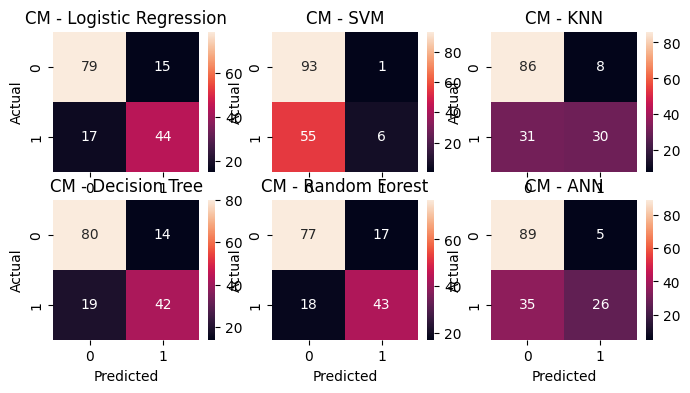

In [4380]:
cm = confusion_matrix(y_true=y_test, y_pred=lr_predictions)
plt.figure(figsize=(8, 4))
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - Logistic Regression')

cm = confusion_matrix(y_true=y_test, y_pred=svm_predictions)
plt.subplot(2, 3, 2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - SVM')

cm = confusion_matrix(y_true=y_test, y_pred=knn_predictions)
plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - KNN')

cm = confusion_matrix(y_true=y_test, y_pred=dt_predictions)
plt.subplot(2, 3, 4)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - Decision Tree')

cm = confusion_matrix(y_true=y_test, y_pred=rf_predictions)
plt.subplot(2, 3, 5)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - Random Forest')

cm = confusion_matrix(y_true=y_test, y_pred=ann_predictions.round())
plt.subplot(2, 3, 6)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('CM - ANN')
plt.show

# 4. Cross validation:

In [4381]:
keras_ann = KerasClassifier(build_fn=ann_model, epochs=100, batch_size=32, verbose=0)

In [4382]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(keras_ann)

In [4383]:
classifiers

[LogisticRegression(),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),

In [4384]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(estimator=classifier, X=X_train, y=y_train, scoring = 'accuracy', cv = 10))

2/2 [==============================] - 0s 3ms/step


In [4385]:
classifiers

[LogisticRegression(),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),

In [4386]:
cv_results = pd.DataFrame(cv_results)
cv_index = ['LogisticRegression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'ANN']
cv_results['Model'] = cv_index
cv_results.set_index('Model', inplace=True)
cv_results['Mean'] = cv_results.mean(axis=1)
cv_results

,0,1,2,3,4,5,6,7,8,9,Mean
Model,,,,,,,,,,,
LogisticRegression,0.774194,0.741935,0.790323,0.741935,0.887097,0.758065,0.725806,0.887097,0.790323,0.903226,0.800000
SVM,0.693548,0.661290,0.661290,0.677419,0.661290,0.709677,0.709677,0.677419,0.677419,0.661290,0.679032
KNN,0.774194,0.741935,0.741935,0.741935,0.854839,0.822581,0.758065,0.838710,0.741935,0.870968,0.788710
Decision Tree,0.741935,0.758065,0.838710,0.709677,0.838710,0.741935,0.838710,0.903226,0.774194,0.854839,0.800000
Random Forest,0.725806,0.806452,0.838710,0.758065,0.854839,0.790323,0.790323,0.967742,0.822581,0.887097,0.824194
ANN,0.725806,0.790323,0.854839,0.741935,0.790323,0.758065,0.806452,0.870968,0.822581,0.854839,0.801613


# 5. XAI (Shap Value):

In [4387]:
pip install SHAP


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4388]:
import shap  
shap.initjs()

In [4389]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf)
# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)

Expected Value: [0.67585253 0.32414747]


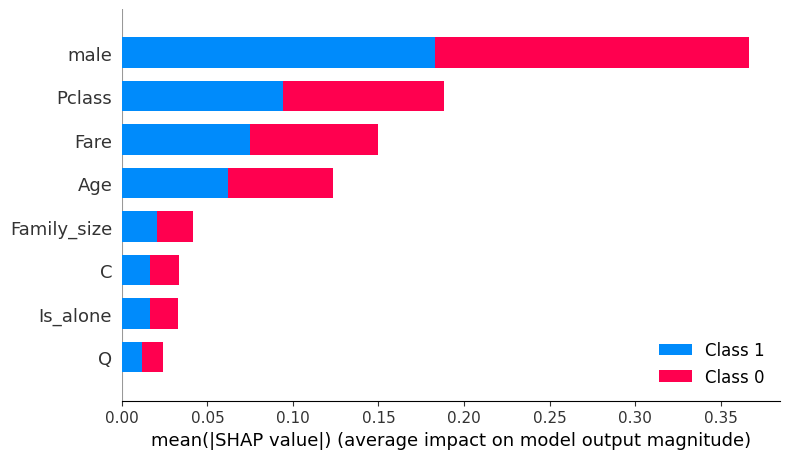

In [4395]:
shap.initjs() 
shap.summary_plot(shap_values,  X_test, plot_type="bar")